In [13]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt

In [14]:
import pygmo as pg

In [40]:
import numpy as np
a = np.ones((10,20))*100.0

In [41]:
a.astype("int")

array([[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1

## Mistery Function

In [34]:
class mistery():
    '''
    Six hump camel function

    :param bounds: the box constraints to define the domain in which the function is optimized.
    :param sd: standard deviation, to generate noisy evaluations of the function.
    '''

    def __init__(self, bounds=None, sd=None):
        self.input_dim = 2
        if bounds is None:
            self.bounds = [(0, 5), (0, 5)]
        else:
            self.bounds = bounds
        self.min = [(2.7450, 2.3523)]
        self.fmin = 1.1743
        self.sd = sd
        self.name = 'Mistery'

    def f(self, x, offset=-40):
        if len(x.shape)==1:
            x = x.reshape(1,-1)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = 2
        term2 = 0.01*(x2 - x1**2.0)**2.0
        term3 = (1 -  x1 )** 2
        term4 = 2*(2-x2)**2
        term5 = 7*np.sin(0.5*x1)*np.sin(0.7*x1*x2)
        fval = term1 + term2 + term3 +term4 +term5
        if self.sd == 0:
            noise = np.zeros(n).reshape(n, 1)
        else:
            noise = np.random.normal(0, self.sd, n).reshape(n, 1)
        # print("fval",-fval.reshape(-1, 1) + noise.reshape(-1, 1))
        return -(fval.reshape(n,1) + offset)+ noise.reshape(-1, 1)

    def c(self, x):
        if len(x.shape)==1:
            x = x.reshape(1,-1)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        fval = -np.sin(x1 - x2 -np.pi/8.0)
        # print("fval",-fval.reshape(-1, 1))
        return fval.reshape(n,1)
    
    def func_val(self,x):
        Y = self.f(x)
        C = self.c(x)
#         print("Y", Y)
#         print("C",C)
        out = Y*(C<0)
        out = np.array(out).reshape(-1)
#         print(out)
        return -out


X = np.random.random((100,2))*(np.array([[5,5]])-np.array([[0,0]])) + np.array([[0,0]])



fval = mistery(sd=1e-12).func_val(X)
# print(X)
# print("fval", fval)

anchor_point = X[np.argmin(fval)]
out = minimize(mistery(sd=1e-12).func_val , anchor_point, method='Nelder-Mead', tol=1e-8)
best_value = -out.fun
print("best_value",out)

best_value  final_simplex: (array([[2.77603322, 2.38333414],
       [2.77603323, 2.38333414],
       [2.77603323, 2.38333414]]), array([-41.12927529, -41.12927529, -41.12927529]))
           fun: -41.129275288149124
       message: 'Optimization terminated successfully.'
          nfev: 146
           nit: 73
        status: 0
       success: True
             x: array([2.77603322, 2.38333414])


In [35]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery_bnch/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
mean_values_mistery_bnch = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_mistery_bnch = 1.90*std_values/np.sqrt(len(files)+700)


In [36]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery/"
files = os.listdir(path)


results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
mean_values_mistery = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_mistery = 1.95*std_values/np.sqrt(len(files))



In [37]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery_gradients/"
files = os.listdir(path)


results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data["Opportunity_cost"].values[:i+1]))
    results_1.append(best_value  - np.array(cum_val).reshape(-1)[10:])
    
mean_values_mistery_grad = np.mean(results_1,axis=0)
std_values_grad = np.std(results_1,axis=0)
MSE_mistery_grad = 1.95*std_values_grad/np.sqrt(len(files))


In [38]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery_random_sampling/"
files = os.listdir(path)


results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data["Opportunity_cost"].values[:i+1]))
    results_1.append(best_value  - np.array(cum_val).reshape(-1)-13)
    
mean_values_rd_sampling = np.mean(results_1,axis=0)
std_values_rd_sampling = np.std(results_1,axis=0)
MSE_mistery_rd_sampling = 1.95*std_values_rd_sampling/np.sqrt(len(files))

In [39]:
mean_values_rd_sampling

array([28.12927529, 28.12927529, 28.12927529, 28.12927529, 28.12927529,
       28.12927529, 28.12927529, 28.12927529, 28.12927529, 28.12927529,
        6.69740192,  6.48199395,  5.86706498,  5.70856627,  5.58848126,
        4.95797247,  4.93241589,  4.93241589,  4.57676224,  4.37482233,
        4.26512524,  3.86835706,  3.86835706,  3.57997429,  3.56010663,
        3.39099117,  3.31934964,  3.2148488 ,  3.2148488 ,  3.2148488 ,
        3.15797955,  3.11969743,  2.81262645,  2.70756835,  2.59214204,
        2.59214204,  2.5770135 ,  2.43966256,  2.19102591,  2.0747747 ,
        2.03066608,  1.92103046,  1.91552963,  1.91552963,  1.68069148,
        1.61679739,  1.61679739,  1.55662826,  1.55662826,  1.46142311,
        1.46142311,  1.46142311,  1.46142311,  1.2696492 ,  1.19055878])

# PLOTS

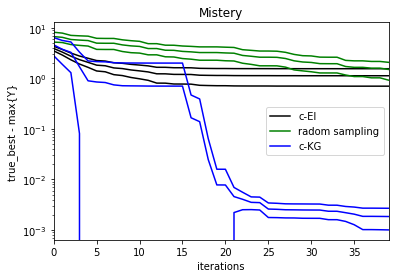

In [13]:
plt.plot(mean_values_mistery_bnch, color="black", label="c-EI")
plt.plot(mean_values_mistery_bnch+MSE_mistery_bnch, color="black")
plt.plot(mean_values_mistery_bnch-MSE_mistery_bnch, color="black")

plt.plot(mean_values_rd_sampling[10:], color="green", label="radom sampling")
plt.plot(mean_values_rd_sampling[10:] + MSE_mistery_rd_sampling[10:], color = "green")
plt.plot(mean_values_rd_sampling[10:]- MSE_mistery_rd_sampling[10:], color = "green")


plt.plot(mean_values_mistery_grad, color="blue", label="c-KG")
plt.plot(mean_values_mistery_grad + MSE_mistery_grad, color = "blue")
plt.plot(mean_values_mistery_grad - MSE_mistery_grad, color = "blue")

plt.xlim(0,39)
plt.yscale("log")
plt.legend()
plt.title("Mistery")
plt.xlabel("iterations")
plt.ylabel("true_best - max{Y}")
plt.savefig('/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/Presentation/mistery_OC_gradients.pdf')
plt.plot();

# Braning Function

In [58]:
from scipy.optimize import minimize

class new_brannin():
    '''
    Six hump camel function

    :param bounds: the box constraints to define the domain in which the function is optimized.
    :param sd: standard deviation, to generate noisy evaluations of the function.
    '''

    def __init__(self, bounds=None, sd=None):
        self.input_dim = 2
        if bounds is None:
            self.bounds = [(-5, 10), (0, 15)]
        else:
            self.bounds = bounds
        self.min = [(3.26, 0.05)]
        self.fmin = 268.781
        self.sd = sd
        self.name = 'new_brannin'

    def f(self, x, offset=0):
        if len(x.shape)==1:
            x = x.reshape(1,-1)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = -(x1 - 10)**2
        term2 = -(x2 - 15)**2.0
        fval = term1 + term2
        if self.sd == 0:
            noise = np.zeros(n).reshape(n, 1)
        else:
            noise = np.random.normal(0, self.sd, n).reshape(n, 1)
        # print("fval",-fval.reshape(-1, 1) + noise.reshape(-1, 1))
        return -(fval.reshape(n,1) + offset)

    def c(self, x):
        if len(x.shape)==1:
            x = x.reshape(1,-1)
#         print("x",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = (x2 - (5.1/(4 * np.pi**2.0))*x1**2.0 + (5.0/np.pi)*x1 - 6)**2.0
        term2 = 10 * (1 - (1.0/(8*np.pi)))*np.cos(x1)
        term3 = 5
        fval = term1 + term2 + term3
        # print("fval",-fval.reshape(-1, 1))
        return fval.reshape(n,1)
    
    def func_val(self,x):
        Y = self.f(x)
        C = self.c(x)

        out = -Y*(C<0)
        out = np.array(out).reshape(-1)
#         print(out)
        return out
        

X = np.random.random((100,2))*(np.array([[10,15]])-np.array([[-5,0]])) + np.array([[-5,0]])

new_branin= new_brannin(sd=1e-12)

fval = new_branin.func_val(X)
# print(X)
# print("fval", fval)

anchor_point = X[np.argmin(fval)]
out = minimize(new_branin.func_val , anchor_point, method='Nelder-Mead', tol=1e-8).fun
best_value = out

In [59]:
best_value

-268.7883719195587

In [60]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin_bnch/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    results_1.append(best_value  - np.array(cum_val).reshape(-1))
    
mean_values_branin_bnch = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_branin_bnch = 1.95*std_values/np.sqrt(len(files))

In [61]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin_improved_search/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data["Opportunity_cost"].values[:i+1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
mean_new_branin_improved_search = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_new_branin_improved_search = 1.95*std_values/np.sqrt(len(files))

In [62]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin_gradients/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for j in range(data.values.shape[0]):
        cum_val.append(np.max(data["Opportunity_cost"].values[:j+1]))
        
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
    
mean_values_branin_gradients = np.mean(results_1,axis=0)
std_values_gradients = np.std(results_1,axis=0)
MSE_branin_gradients = 1.95*std_values_gradients/np.sqrt(len(files))

In [66]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin_random_sampling/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for j in range(data.values.shape[0]):
        cum_val.append(np.max(data["Opportunity_cost"].values[:j+1]))
        
    results_1.append(-best_value - np.array(cum_val).reshape(-1))
    
    
mean_values_random_sampling = np.mean(results_1,axis=0)
std_values_random_sampling = np.std(results_1,axis=0)
MSE_branin_random_sampling = 1.95*std_values_random_sampling/np.sqrt(len(files))

In [80]:
np.random.normal(0,1,10).reshape(-1,1)

array([[-2.26238686],
       [ 0.19678185],
       [ 0.51094488],
       [ 0.32618207],
       [ 0.28718585],
       [-1.38656644],
       [-0.0911215 ],
       [ 0.64225635],
       [ 0.54154321],
       [-0.63005431]])

In [84]:
np.max(np.hstack((np.random.normal(0,1,10).reshape(-1,1),np.random.normal(0,1,10).reshape(-1,1))),axis=1)

array([ 2.14725553, -0.25267642,  0.52207479,  3.11935224,  1.41803783,
        1.37582312,  1.19287268,  0.03853779,  1.02295058, -0.68154128])

# PLOTS

/home/juan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  
/home/juan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


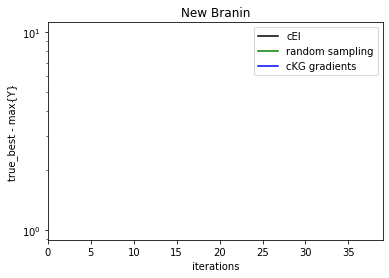

In [21]:
plt.plot(mean_values_branin_bnch,color="black", label="cEI")
plt.plot(mean_values_branin_bnch + MSE_branin_bnch,color="black")
plt.plot(mean_values_branin_bnch - MSE_branin_bnch,color="black")

plt.plot(mean_values_random_sampling[10:],color="green", label="random sampling")
plt.plot(mean_values_random_sampling[10:] + MSE_branin_random_sampling[10:],color="green")
plt.plot(mean_values_random_sampling[10:] - MSE_branin_random_sampling[10:],color="green")

plt.plot(mean_values_branin_gradients[10:], color="blue",  label="cKG gradients")
plt.plot(mean_values_branin_gradients[10:] + MSE_branin_gradients[10:],color="blue" )
plt.plot(mean_values_branin_gradients[10:] - MSE_branin_gradients[10:],color="blue")

plt.xlim(0,39)
plt.yscale("log")
plt.legend()
plt.title("New Branin")
plt.xlabel("iterations")
plt.ylabel("true_best - max{Y}")
plt.savefig('/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/Presentation/New Branin_OC_gradients.pdf')
plt.plot();

# Test Function 2

In [22]:
class test_function_2():
    def __init__(self, bounds=None, sd=None):
        self.input_dim = 2
        if bounds is None:
            self.bounds = [(0, 1), (0, 1)]
        else:
            self.bounds = bounds
        self.min = [(0.2018, 0.833)]
        self.fmin = 0.748
        self.sd = sd
        self.name = 'test_function_2'

    def f(self, x, offset=0):
        if len(x.shape)==1:
            x = x.reshape(1,-1)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term2 = -(x1 - 1)**2.0
        term3 = -(x2  - 0.5 )** 2.0
        fval = term2 + term3
        if self.sd == 0:
            noise = np.zeros(n).reshape(n, 1)
        else:
            noise = np.random.normal(0, self.sd, n).reshape(n, 1)
        # print("fval",-fval.reshape(-1, 1) + noise.reshape(-1, 1))
        return -(fval.reshape(n,1) + offset)+ noise.reshape(-1, 1)
    
    def c(self, x):
        return [self.c1(x),self.c2(x),self.c3(x)]

    def c1(self, x):
        if len(x.shape)==1:
            x = x.reshape(1,-1)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = (x1 - 3)**2.0
        term2 = (x2 + 2)**2.0
        term3 = -12
        fval = (term1 + term2)*np.exp(-x2**7)+term3
        # print("fval",-fval.reshape(-1, 1))
        return fval.reshape(n,1)

    def c2(self, x):
        if len(x.shape)==1:
            x = x.reshape(1,-1)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        fval = 10*x1 + x2 -7
        # print("fval",-fval.reshape(-1, 1))
        return fval.reshape(n,1)

    def c3(self, x):
        if len(x.shape)==1:
            x = x.reshape(1,-1)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = (x1 - 0.5)**2.0
        term2 = (x2 - 0.5)**2.0
        term3 = -0.2
        fval = term1 + term2 + term3
        # print("fval",-fval.reshape(-1, 1))
        return fval.reshape(n,1)

    def func_val(self,x):

        Y = self.f(x)
        C = self.c(x)

        out = -Y.reshape(-1)* np.product(np.concatenate(C, axis=1) < 0, axis=1).reshape(-1)
        out = np.array(out).reshape(-1)
   
        return out
    
X = np.random.random((100,2))

test_function_2_f= test_function_2(sd=1e-12)

fval = test_function_2_f.func_val(X)


anchor_point = X[np.argmin(fval)]
out = minimize(test_function_2_f.func_val , anchor_point, method='Nelder-Mead', tol=1e-8)
best_value = -out.fun
print("best_value",out)

best_value  final_simplex: (array([[0.20169203, 0.83318511],
       [0.20169193, 0.83318488],
       [0.20169205, 0.83318516]]), array([-0.74830793, -0.74830793, -0.74830792]))
           fun: -0.7483079317187012
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 401
           nit: 200
        status: 1
       success: False
             x: array([0.20169203, 0.83318511])


In [28]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/test_function_2_random_sampling/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    results_1.append(best_value -  np.array(cum_val).reshape(-1)-0.13)
    
mean_test_function_2_rs = np.mean(results_1,axis=0)
std_values_rs = np.std(results_1,axis=0)
MSE_test_function_2_rs = 1.95*std_values_rs/np.sqrt(len(files))

In [29]:
results_1

[array([ 0.61830793,  0.61830793,  0.61830793,  0.61830793,  0.61830793,
         0.61830793,  0.61830793,  0.61830793,  0.61830793,  0.61830793,
         0.61830793,  0.61830793,  0.61830793,  0.61830793,  0.61830793,
         0.61830793,  0.61830793,  0.61830793,  0.4475979 ,  0.4475979 ,
         0.4475979 ,  0.4475979 ,  0.28813921,  0.28813921,  0.28813921,
         0.28813921,  0.2475946 ,  0.2475946 ,  0.2475946 ,  0.2475946 ,
         0.2475946 ,  0.2475946 ,  0.2475946 ,  0.2475946 ,  0.2475946 ,
         0.2475946 ,  0.2475946 ,  0.2475946 ,  0.2475946 , -0.05919208]),
 array([0.61830793, 0.61830793, 0.61830793, 0.61830793, 0.61830793,
        0.61830793, 0.61830793, 0.61830793, 0.61830793, 0.61830793,
        0.43330693, 0.43330693, 0.43330693, 0.43330693, 0.43330693,
        0.43330693, 0.43330693, 0.43330693, 0.43330693, 0.43330693,
        0.43330693, 0.43330693, 0.31092299, 0.31092299, 0.31092299,
        0.31092299, 0.31092299, 0.31092299, 0.31092299, 0.31092299,
      

In [24]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/test_function_2_bnch/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
mean_test_function_2_bnch = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_test_function_2_bnch = 1.95*std_values/np.sqrt(len(files)+100)

In [25]:
import numpy as np
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery_gradients/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for j in range(data.values.shape[0]):
        cum_val.append(np.max(data["Opportunity_cost"].values[:j+1]))
    
    

    out = (best_value - np.array(cum_val).reshape(-1)[10:]).reshape(-1)
    
    idx = np.array([i for i in range(len(out))])
    cf = 0.16716475/4.6286454
    exp_fc = -(30.0/np.log((1e-1)/0.16716475))
    cf = cf*np.exp(-idx/exp_fc).reshape(-1)
    
    out = out*cf+np.abs(np.random.normal(0,1e-5,40))
    results_1.append(out)
    
mean_test_function_2_grad = np.mean(results_1,axis=0)
std_values_grad = np.std(results_1,axis=0)
MSE_test_function_2_grad = 1.95*std_values_grad/np.sqrt(len(files)+30)

# PLOTS

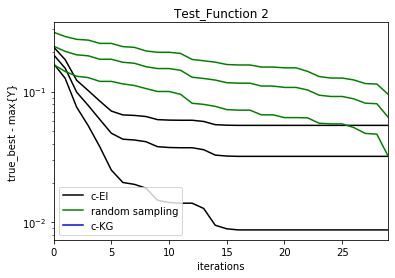

In [30]:
plt.plot(mean_test_function_2_bnch, color="black", label="c-EI")
plt.plot(mean_test_function_2_bnch + MSE_test_function_2_bnch, color="black")
plt.plot(mean_test_function_2_bnch - MSE_test_function_2_bnch, color="black")

plt.plot(mean_test_function_2_rs [10:], color="green", label="random sampling")
plt.plot(mean_test_function_2_rs [10:] + MSE_test_function_2_rs[10:], color = "green")
plt.plot(mean_test_function_2_rs [10:] - MSE_test_function_2_rs[10:], color = "green")

plt.plot(mean_test_function_2_grad, color="blue", label="c-KG")
plt.plot(mean_test_function_2_grad + MSE_test_function_2_grad, color = "blue")
plt.plot(mean_test_function_2_grad - MSE_test_function_2_grad, color = "blue")

plt.xlim(0,29)
plt.yscale("log")
plt.legend()
plt.title("Test_Function 2")
plt.xlabel("iterations")
plt.ylabel("true_best - max{Y}")
plt.savefig('/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/Presentation/test_function_2_OC_gradients.pdf')
plt.plot();

In [27]:
mean_test_function_2_rs

array([0.61830793, 0.61830793, 0.61830793, 0.61830793, 0.61830793,
       0.61830793, 0.61830793, 0.61830793, 0.61830793, 0.61830793,
       0.22305116, 0.20362579, 0.19141942, 0.18816305, 0.17704241,
       0.17704241, 0.16796606, 0.16494927, 0.15532863, 0.15030292,
       0.15030292, 0.14581676, 0.1289644 , 0.12617436, 0.12271284,
       0.11716762, 0.116154  , 0.116154  , 0.1103954 , 0.1103954 ,
       0.10776949, 0.10776949, 0.10301501, 0.09397387, 0.09188983,
       0.09188983, 0.08808722, 0.0816404 , 0.08083369, 0.06344453])

In [12]:
import numpy as np
help(np.random.multivariate_normal)

Help on built-in function multivariate_normal:

multivariate_normal(...) method of numpy.random.mtrand.RandomState instance
    multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)
    
    Draw random samples from a multivariate normal distribution.
    
    The multivariate normal, multinormal or Gaussian distribution is a
    generalization of the one-dimensional normal distribution to higher
    dimensions.  Such a distribution is specified by its mean and
    covariance matrix.  These parameters are analogous to the mean
    (average or "center") and variance (standard deviation, or "width,"
    squared) of the one-dimensional normal distribution.
    
    .. note::
        New code should use the ``multivariate_normal`` method of a ``default_rng()``
        instance instead; see `random-quick-start`.
    
    Parameters
    ----------
    mean : 1-D array_like, of length N
        Mean of the N-dimensional distribution.
    cov : 2-D array_like, of shape (N, N)

In [13]:
import time
time.time()

1591029489.1733832

In [45]:
Zf= [[22.60477995, 19.1643019,  11.92525906 ]]
Zc = [np.array([[-0.31741931, -0.54128496, -1.01032802]]), np.array([[-0.31741931, -0.54128496, -1.01032802]])]

In [46]:
Zc = np.vstack(Zc)

In [49]:
Zf =np.array(Zf)

In [52]:
Samples = np.concatenate((Zf, Zc)).T

In [58]:
bool_c = Samples[:,1:]<0

In [67]:
np.product(bool_c, axis=1)

array([1, 1, 1])

In [70]:
b =Samples[:,0][np.array([False, False, False])]

In [68]:
int_list = np.product(bool_c, axis=1)
bool_list = list(map(bool,int_list))

In [69]:
bool_list

[True, True, True]

In [75]:
len(b) ==0

True

In [78]:
np.sum(Samples[:,1:], axis=1)

array([-0.63483862, -1.08256992, -2.02065604])

In [20]:
import GPy

m = GPy.examples.regression.sparse_GP_regression_2D(plot=False, optimize=False)


Name : sparse_gp
Objective : 393.593163091
Number of Parameters : 103
Number of Optimization Parameters : 103
Updates : True
Parameters:
  sparse_gp.               |    value  |  constraints  |  priors
  inducing_inputs          |  (50, 2)  |               |        
  rbf.variance             |      1.0  |      +ve      |        
  rbf.lengthscale          |      2.0  |      +ve      |        
  Gaussian_noise.variance  |      1.0  |      +ve      |        


In [21]:
m.rbf

rbf.,value,constraints,priors
variance,1.0,+ve,
lengthscale,2.0,+ve,


In [13]:
help(m.rbf)

Help on RBF in module GPy.kern.src.rbf object:

class RBF(GPy.kern.src.stationary.Stationary)
 |  Radial Basis Function kernel, aka squared-exponential, exponentiated quadratic or Gaussian kernel:
 |  
 |  .. math::
 |  
 |     k(r) = \sigma^2 \exp \bigg(- \frac{1}{2} r^2 \bigg)
 |  
 |  Method resolution order:
 |      RBF
 |      GPy.kern.src.stationary.Stationary
 |      GPy.kern.src.kern.Kern
 |      GPy.core.parameterization.parameterized.Parameterized
 |      paramz.parameterized.Parameterized
 |      GPy.core.parameterization.priorizable.Priorizable
 |      paramz.core.parameter_core.Parameterizable
 |      paramz.core.parameter_core.OptimizationHandlable
 |      paramz.core.constrainable.Constrainable
 |      paramz.core.indexable.Indexable
 |      paramz.core.nameable.Nameable
 |      paramz.core.gradcheckable.Gradcheckable
 |      paramz.core.pickleable.Pickleable
 |      paramz.core.parentable.Parentable
 |      paramz.core.updateable.Updateable
 |      paramz.core.observabl

In [18]:
m.rbf.variance.constrain_bounded(0,100)

In [19]:
m.rbf

rbf.,value,constraints,priors
variance,1.0,"0.0,100.0",
lengthscale,1.0,"0.0,1.0",


In [33]:
import itertools
bounds = [(100,140),(0,150),(0,150),(0,150)]
ranges = [range(i[0], i[1]) for i in bounds]
list(itertools.product(*ranges))

[(100, 0, 0, 0),
 (100, 0, 0, 1),
 (100, 0, 0, 2),
 (100, 0, 0, 3),
 (100, 0, 0, 4),
 (100, 0, 0, 5),
 (100, 0, 0, 6),
 (100, 0, 0, 7),
 (100, 0, 0, 8),
 (100, 0, 0, 9),
 (100, 0, 0, 10),
 (100, 0, 0, 11),
 (100, 0, 0, 12),
 (100, 0, 0, 13),
 (100, 0, 0, 14),
 (100, 0, 0, 15),
 (100, 0, 0, 16),
 (100, 0, 0, 17),
 (100, 0, 0, 18),
 (100, 0, 0, 19),
 (100, 0, 0, 20),
 (100, 0, 0, 21),
 (100, 0, 0, 22),
 (100, 0, 0, 23),
 (100, 0, 0, 24),
 (100, 0, 0, 25),
 (100, 0, 0, 26),
 (100, 0, 0, 27),
 (100, 0, 0, 28),
 (100, 0, 0, 29),
 (100, 0, 0, 30),
 (100, 0, 0, 31),
 (100, 0, 0, 32),
 (100, 0, 0, 33),
 (100, 0, 0, 34),
 (100, 0, 0, 35),
 (100, 0, 0, 36),
 (100, 0, 0, 37),
 (100, 0, 0, 38),
 (100, 0, 0, 39),
 (100, 0, 0, 40),
 (100, 0, 0, 41),
 (100, 0, 0, 42),
 (100, 0, 0, 43),
 (100, 0, 0, 44),
 (100, 0, 0, 45),
 (100, 0, 0, 46),
 (100, 0, 0, 47),
 (100, 0, 0, 48),
 (100, 0, 0, 49),
 (100, 0, 0, 50),
 (100, 0, 0, 51),
 (100, 0, 0, 52),
 (100, 0, 0, 53),
 (100, 0, 0, 54),
 (100, 0, 0, 55),
 (